# Solar Plant Predictive Modeling
---------------------------------
In the simple script below, I use the dataset from Kaggle, the Solar Power Generation dataset.
After a bit of cleaning up, I train and use three different models: random forrest, a gradient boosting, and a neural network. I then evaluate the models based upon the Mean Absolute Error, Root Mean Squared Error, and the R-Squared.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Data Cleaning & Feature Engineering

def clean_and_engineer_features_v2(gen_data, weather_data, date_format_gen, date_format_weather):
    # Convert DATE_TIME to datetime with the appropriate format
    gen_data['DATE_TIME'] = pd.to_datetime(gen_data['DATE_TIME'], format=date_format_gen)
    weather_data['DATE_TIME'] = pd.to_datetime(weather_data['DATE_TIME'], format=date_format_weather)

    # Handle missing values: Fill missing values in numerical columns with the mean
    gen_data.fillna(gen_data.mean(numeric_only=True), inplace=True)
    weather_data.fillna(weather_data.mean(numeric_only=True), inplace=True)

    # Create time-based features (hour of day, day of year)
    gen_data['hour_of_day'] = gen_data['DATE_TIME'].dt.hour
    gen_data['day_of_year'] = gen_data['DATE_TIME'].dt.dayofyear

    weather_data['hour_of_day'] = weather_data['DATE_TIME'].dt.hour
    weather_data['day_of_year'] = weather_data['DATE_TIME'].dt.dayofyear

    # Merge generation data with weather data based on DATE_TIME
    merged_data = pd.merge(gen_data, weather_data, on=['DATE_TIME', 'PLANT_ID'])

    return merged_data

# I had downloaded the data from kaggle and saved it in the same directory as this script, 
# so I will use the path to the data in my local machine. But I also included the data in the repo
# Prepare data for Plant 1
plant_1_gen_data = pd.read_csv('/Users/zach/Documents/GitHub/predictive-modeling/solar-energy-forecast/solar_plant_data/Plant_1_Generation_Data.csv')
plant_1_weather_data = pd.read_csv('/Users/zach/Documents/GitHub/predictive-modeling/solar-energy-forecast/solar_plant_data/Plant_1_Weather_Sensor_Data.csv')
plant_1_merged_data = clean_and_engineer_features_v2(plant_1_gen_data, plant_1_weather_data, '%d-%m-%Y %H:%M', '%Y-%m-%d %H:%M:%S')

# Prepare data for Plant 2
plant_2_gen_data = pd.read_csv('/Users/zach/Documents/GitHub/predictive-modeling/solar-energy-forecast/solar_plant_data/Plant_2_Generation_Data.csv')
plant_2_weather_data = pd.read_csv('/Users/zach/Documents/GitHub/predictive-modeling/solar-energy-forecast/solar_plant_data/Plant_2_Weather_Sensor_Data.csv')
plant_2_merged_data = clean_and_engineer_features_v2(plant_2_gen_data, plant_2_weather_data, '%Y-%m-%d %H:%M:%S', '%Y-%m-%d %H:%M:%S')




In [2]:
# Data Preparation for Modeling
def prepare_data_for_modeling(merged_data):
    X = merged_data[['DC_POWER', 'DAILY_YIELD', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION', 'hour_of_day_x', 'day_of_year_x']]
    y = merged_data['AC_POWER']
    return train_test_split(X, y, test_size=0.2, random_state=42)

# Prepare training and testing data for both plants
X_train_1, X_test_1, y_train_1, y_test_1 = prepare_data_for_modeling(plant_1_merged_data)
X_train_2, X_test_2, y_train_2, y_test_2 = prepare_data_for_modeling(plant_2_merged_data)

In [3]:
# Model Training & Evaluation
def evaluate_model_performance(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    return mae, rmse, r2

In [4]:
# Initialize models
rf_model = RandomForestRegressor(random_state=42)
gb_model = GradientBoostingRegressor(random_state=42)
nn_model = MLPRegressor(random_state=42, max_iter=500)

In [5]:
# Evaluate models on Plant 1 data
rf_results_1 = evaluate_model_performance(rf_model, X_train_1, X_test_1, y_train_1, y_test_1)
gb_results_1 = evaluate_model_performance(gb_model, X_train_1, X_test_1, y_train_1, y_test_1)
nn_results_1 = evaluate_model_performance(nn_model, X_train_1, X_test_1, y_train_1, y_test_1)

# Display results
print("Plant 1 Random Forest: MAE:", rf_results_1[0], "RMSE:", rf_results_1[1], "R2:", rf_results_1[2])
print("Plant 1 Gradient Boosting: MAE:", gb_results_1[0], "RMSE:", gb_results_1[1], "R2:", gb_results_1[2])
print("Plant 1 Neural Network: MAE:", nn_results_1[0], "RMSE:", nn_results_1[1], "R2:", nn_results_1[2])


Plant 1 Random Forest: MAE: 0.13275560787557844 RMSE: 1.1070465471970945 R2: 0.9999920575702337
Plant 1 Gradient Boosting: MAE: 1.1787354660145954 RMSE: 2.3637329587324456 R2: 0.9999637908407186
Plant 1 Neural Network: MAE: 1.7858078291528694 RMSE: 2.55668153591753 R2: 0.9999576381527687


In [6]:
# Evaluate models on Plant 2 data
rf_results_2 = evaluate_model_performance(rf_model, X_train_2, X_test_2, y_train_2, y_test_2)
gb_results_2 = evaluate_model_performance(gb_model, X_train_2, X_test_2, y_train_2, y_test_2)
nn_results_2 = evaluate_model_performance(nn_model, X_train_2, X_test_2, y_train_2, y_test_2)

# Display results
print("Plant 2 Random Forest: MAE:", rf_results_2[0], "RMSE:", rf_results_2[1], "R2:", rf_results_2[2])
print("Plant 2 Gradient Boosting: MAE:", gb_results_2[0], "RMSE:", gb_results_2[1], "R2:", gb_results_2[2])
print("Plant 2 Neural Network: MAE:", nn_results_2[0], "RMSE:", nn_results_2[1], "R2:", nn_results_2[2])

Plant 2 Random Forest: MAE: 0.11049257082098267 RMSE: 0.3912464373001319 R2: 0.9999988255267074
Plant 2 Gradient Boosting: MAE: 0.9946988334660485 RMSE: 1.916129172421995 R2: 0.999971829670976
Plant 2 Neural Network: MAE: 0.49594400413932405 RMSE: 0.6470372396584498 R2: 0.9999967878123552


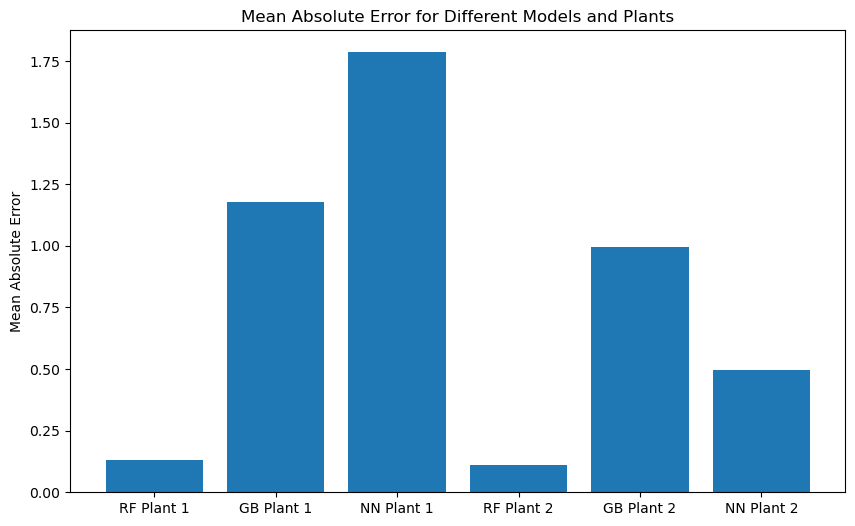

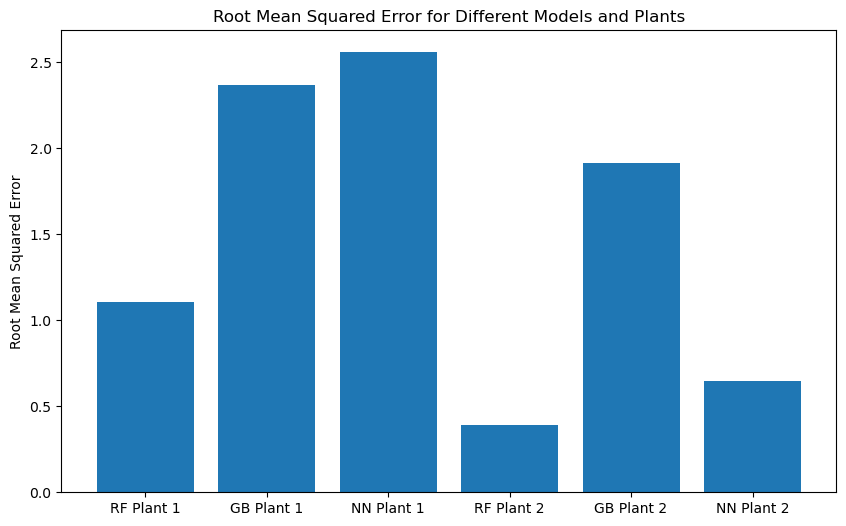

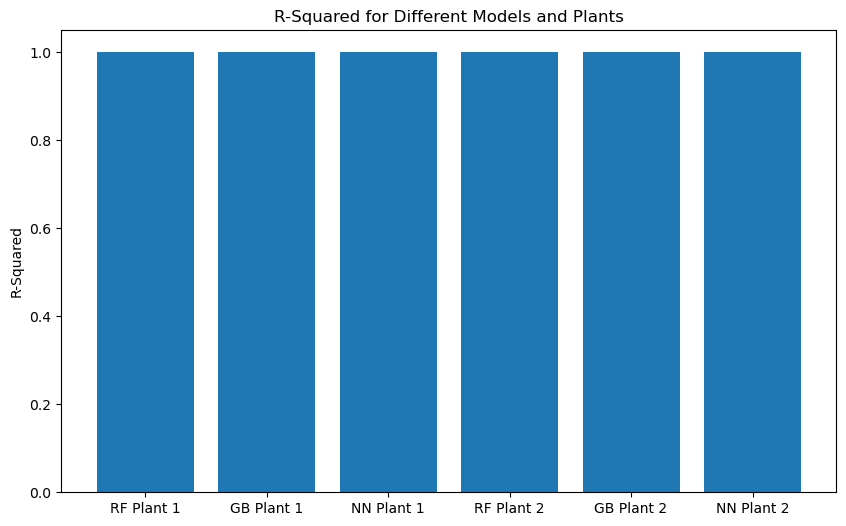

In [7]:
# Visualize the results
import matplotlib.pyplot as plt

# Create a bar chart for MAE
plt.figure(figsize=(10, 6))
plt.bar(['RF Plant 1', 'GB Plant 1', 'NN Plant 1', 'RF Plant 2', 'GB Plant 2', 'NN Plant 2'],
        [rf_results_1[0], gb_results_1[0], nn_results_1[0], rf_results_2[0], gb_results_2[0], nn_results_2[0]])
plt.ylabel('Mean Absolute Error')
plt.title('Mean Absolute Error for Different Models and Plants')
plt.show()

# Create a bar chart for RMSE
plt.figure(figsize=(10, 6))
plt.bar(['RF Plant 1', 'GB Plant 1', 'NN Plant 1', 'RF Plant 2', 'GB Plant 2', 'NN Plant 2'],
        [rf_results_1[1], gb_results_1[1], nn_results_1[1], rf_results_2[1], gb_results_2[1], nn_results_2[1]])
plt.ylabel('Root Mean Squared Error')
plt.title('Root Mean Squared Error for Different Models and Plants')
plt.show()

# Create a bar chart for R2
plt.figure(figsize=(10, 6))
plt.bar(['RF Plant 1', 'GB Plant 1', 'NN Plant 1', 'RF Plant 2', 'GB Plant 2', 'NN Plant 2'],
        [rf_results_1[2], gb_results_1[2], nn_results_1[2], rf_results_2[2], gb_results_2[2], nn_results_2[2]])
plt.ylabel('R-Squared')
plt.title('R-Squared for Different Models and Plants')
plt.show()
